In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [ ]:
myToken = 'ABC123.XXXXXX.84098767' # Own token from EODHistoricalData

In [2]:
# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

from myFunctions import *

# Getting All The Fundamental Data We Want

In [3]:
def get_exchanges_list(api_token='OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX', session=None): #Move to myFunctions.py
    '''
    Get list of stock exchanges. 
    Returns a list of dictionaries.
    '''
    if session is None:
        session = requests.Session()
    url = 'https://eodhistoricaldata.com/api/exchanges-list/'
    params = {'api_token': api_token, 'fmt': json}
    r = session.get(url, params=params)
    if r.status_code == requests.codes.ok:
        return json.loads(r.text)
    else:
        raise Exception(r.status_code, r.reason, url)

In [4]:
from io import StringIO # read string as file for pandas

def get_stocks_list(exchange_symbol='LSE', 
                    api_token='OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX', 
                    session=None): #Move to myFunctions.py
    '''
    Returns list of stocks available for a given exchange symbol.
    Returns a DataFrame.
    '''
    if session is None:
        session = requests.Session()
        
    url = 'https://eodhistoricaldata.com/api/exchange-symbol-list/%s'\
    % exchange_symbol
    
    params = {'api_token': api_token}
    r = session.get(url, params=params)
    if r.status_code == requests.codes.ok:
        df = pd.read_csv(StringIO(r.text), skipfooter=1, engine='python')
        return df
    else:
        raise Exception(r.status_code, r.reason, url)

In [5]:
singleStockData = get_fundamental_data('INTC.US', myToken)
singleStockData.keys()

dict_keys(['General', 'Highlights', 'Valuation', 'SharesStats', 'Technicals', 'SplitsDividends', 'AnalystRatings', 'Holders', 'InsiderTransactions', 'ESGScores', 'outstandingShares', 'Earnings', 'Financials'])

In [6]:
listOfExchanges = get_exchanges_list(myToken)
with open('ListOfExchanges.json','w') as jsonFile:
    json.dump(listOfExchanges, jsonFile)

In [7]:
with open('ListOfExchanges.json', 'r') as myfile:
    listOfExchanges=json.load(myfile)
listOfExchanges = [i['Code'] for i in listOfExchanges]
print(listOfExchanges)

['US', 'LSE', 'NEO', 'V', 'TO', 'BE', 'F', 'STU', 'HA', 'MU', 'HM', 'XETRA', 'DU', 'VI', 'LU', 'MI', 'PA', 'BR', 'MC', 'LS', 'AS', 'SW', 'VX', 'HE', 'RG', 'IC', 'ST', 'OL', 'VS', 'CO', 'NFN', 'IR', 'NB', 'TL', 'HK', 'TA', 'KO', 'KQ', 'BUD', 'WAR', 'PSE', 'SG', 'BSE', 'KAR', 'JSE', 'SN', 'SR', 'SHE', 'BK', 'AT', 'AU', 'NSE', 'SHG', 'JK', 'VN', 'KLSE', 'RO', 'SA', 'BA', 'MX', 'ZSE', 'IL', 'MCX', 'BOND', 'INDX', 'EUFUND', 'IS', 'MONEY', 'ETLX', 'GBOND', 'LIM', 'TWO', 'CC', 'TW', 'COMM', 'FOREX', 'CN']


In [8]:
# Get list of stocks for USA only.
get_stocks_list(exchange_symbol='US', api_token=myToken)

,Code,Name,Country,Exchange,Currency,Type,Isin
0,A,"Agilent Technologies, Inc",USA,NYSE,USD,Common Stock,US00846U1016
1,AA,Alcoa Corporation,USA,NYSE,USD,Common Stock,US0138721065
2,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,NaN
3,AAAAX,DEUTSCHE REAL ASSETS FUND CLASS A,USA,NMFQS,USD,FUND,NaN
4,AAACX,AAACX,USA,NASDAQ,USD,Fund,NaN
...,...,...,...,...,...,...,...
54145,ZZHGY,"ZhongAn Online P & C Insurance Co., Ltd",USA,PINK,USD,Common Stock,NaN
54146,ZZLL,"ZZLL Information Technology, Inc",USA,OTCQB,USD,Common Stock,NaN
54147,ZZZ,TEST TICKER FOR UTP,USA,NYSE ARCA,USD,Common Stock,NaN
54148,ZZZOD,Zinc One Resources Inc,USA,PINK,USD,Common Stock,NaN


In [ ]:
#### OPTIONAL TO DO USA STOCKS ONLY TO FINISH AI INVESTOR IN A DAY.
# listOfExchanges = 'US'

In [10]:
# Get list of stocks for all exchanges.

ticker_df = pd.DataFrame()

for exchange in listOfExchanges:
    temp_df = get_stocks_list(exchange_symbol=exchange, api_token=myToken)
    temp_df['Exchange Code'] = exchange
    ticker_df=ticker_df.append(temp_df)
    
ticker_df=ticker_df[ticker_df['Type']=='Common Stock'] # Only want common stocks
ticker_df=ticker_df[ticker_df['Exchange']!='PINK'] # Personally don't want pink sheets
ticker_df['ticker'] = ticker_df['Code'].astype(str) +'.'+ticker_df['Exchange Code']
listOfTickers = list(ticker_df['ticker'])

In [11]:
listOfTickers

['A.US',
 'AA.US',
 'AAALF.US',
 'AACG.US',
 'AACQ.US',
 'AACQU.US',
 'AACQW.US',
 'AAEEF.US',
 'AAGFF.US',
 'AAIC.US',
 'AAIRF.US',
 'AAL.US',
 'AAMC.US',
 'AAME.US',
 'AAN.US',
 'AAOI.US',
 'AAON.US',
 'AAP.US',
 'AAPL.US',
 'AAQC.US',
 'AAQC-WS.US',
 'AASCF.US',
 'AASZF.US',
 'AAT.US',
 'AAU.US',
 'AAUGF.US',
 'AAUKF.US',
 'AAWW.US',
 'AAXT.US',
 'AAZZF.US',
 'AB.US',
 'ABAKF.US',
 'ABB.US',
 'ABBV.US',
 'ABC.US',
 'ABCB.US',
 'ABCL.US',
 'ABCM.US',
 'ABENU.US',
 'ABEO.US',
 'ABEPF.US',
 'ABETF.US',
 'ABEV.US',
 'ABG.US',
 'ABGI.US',
 'ABIO.US',
 'ABLE.US',
 'ABLGF.US',
 'ABM.US',
 'ABMC.US',
 'ABMD.US',
 'ABML.US',
 'ABMT.US',
 'ABNAF.US',
 'ABNB.US',
 'ABQQ.US',
 'ABR.US',
 'ABRUF.US',
 'ABSOF.US',
 'ABST.US',
 'ABT.US',
 'ABTX.US',
 'ABUS.US',
 'ABVC.US',
 'ABVG.US',
 'ABXXF.US',
 'ABZT.US',
 'AC.US',
 'ACA.US',
 'ACAC.US',
 'ACACU.US',
 'ACACW.US',
 'ACAD.US',
 'ACAH.US',
 'ACAHU.US',
 'ACAHW.US',
 'ACAN.US',
 'ACAVF.US',
 'ACB.US',
 'ACBAU.US',
 'ACBAW.US',
 'ACBI.US',
 'ACBM.U

In [10]:
len(listOfTickers)

69421

In [19]:
len(listOfTickers[9900*7:])

72

In [20]:
#Check account API request allowance: https://eodhistoricaldata.com/cp/settings
# May 2021 max 10,000 fundamental data API calls per day. 
# 1 week do download 69421 stocks data.

# Cut down the list 
listOfTickersToday = listOfTickers[:9900] # to download for today.
#listOfTickersToday = listOfTickers[9900*1:9900*2] # tomorrow, etc.
#listOfTickersToday = listOfTickers[9900*2:9900*3] # day after, etc.
#listOfTickersToday = listOfTickers[9900*6:] # last day

# If an issue arises, for sometimes tickers get delisted etc. 
# then can skip them.
# If the 7037th ticker causes a crash, do:
#listOfTickersToday = listOfTickers[ 9900 * 2 + 7037 : 9900 * 3 ] 
# to start from 7038th.

# Store json files in 'StockDataJsonFiles' directory
import os
if not os.path.isdir('StockDataJsonFiles'):
    os.mkdir('StockDataJsonFiles')

    
i=0
for ticker in listOfTickersToday:
    
    if ticker.rsplit('.', 1)[0] == 'nan': # Issue with nan.XXX
        continue
        
    data = get_fundamental_data(str(ticker), 
                                api_token=myToken, 
                                continueWhenError=True)
    
    try:
        with open('StockDataJsonFiles/'+ ticker +'.json','w') as jsonFile:
            json.dump(data, jsonFile)
    except:
        print('issue with '+ticker)

    print('Call No.', i, ticker, end='\r')
    i+=1

# Example Reading The Financial Data From Files

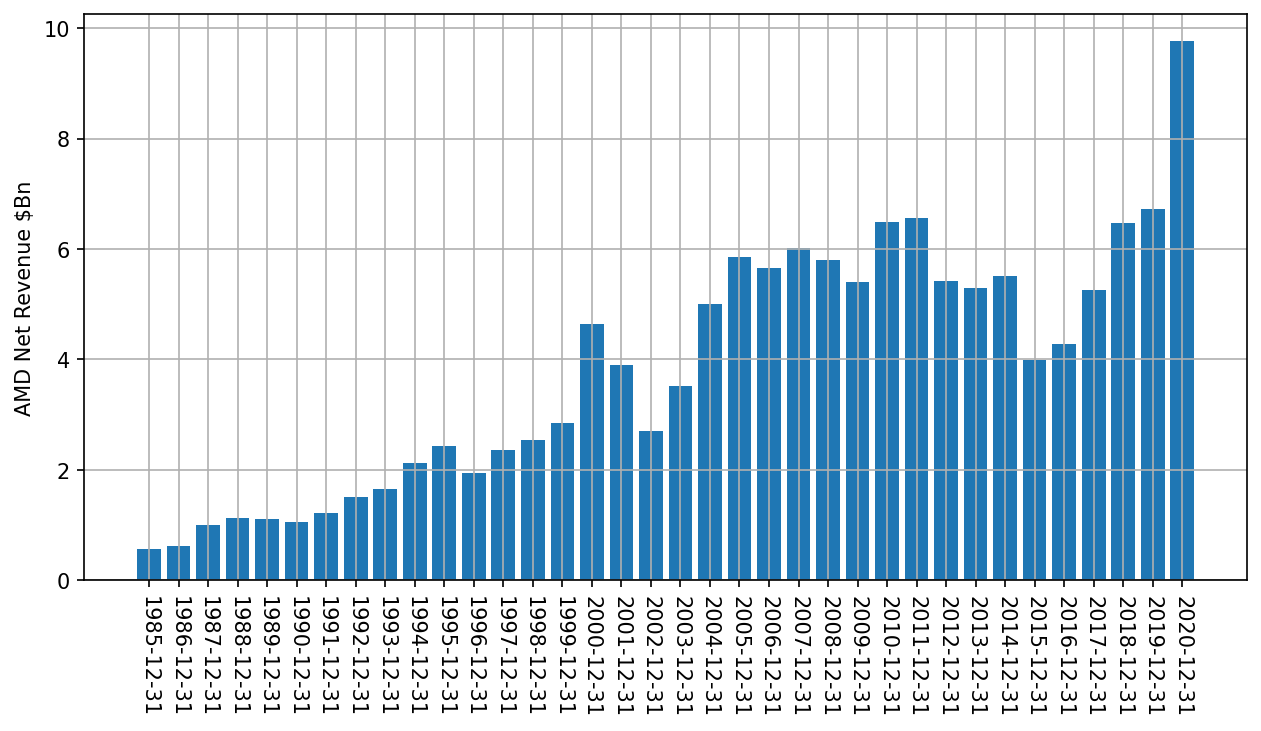

In [10]:
from matplotlib import pyplot as plt

with open('StockDataJsonFiles/AMD.US.json', 'r') as myfile:
    stockData=json.load(myfile)
    
dates_available, incomeByYear = [], []
dates = stockData['Financials']['Income_Statement']['yearly'].keys()

for year in dates:
    num = float(\
    stockData['Financials']['Income_Statement']['yearly'][year]['totalRevenue'])\
    /1e9
    
    if num:
        incomeByYear.append(num)
        dates_available.append(year)
    
plt.figure(figsize=(10,5))
plt.bar(x=dates_available, height=incomeByYear)
plt.xticks(rotation=-90)
plt.grid()
plt.ylabel('AMD Net Revenue $Bn')
ax = plt.gca()
ax.invert_xaxis()

# Combining All Data Into One DataFrame

In [12]:
# dataframe columns
fundamentalDataColumns = ['Code',
'Type',
'Name',
'Exchange',
'CurrencyCode',
'CurrencyName',
'CurrencySymbol',
'CountryName',
'CountryISO',
'ISIN',
'CUSIP',
'CIK',
'EmployerIdNumber',
'FiscalYearEnd',
'IPODate',
'InternationalDomestic',
'Sector',
'Industry',
'GicSector',
'GicGroup',
'GicIndustry',
'GicSubIndustry',
'HomeCategory',
'IsDelisted',
#'Description',
'Address',
'AddressData',
'Listings',
#'Officers',
'Phone',
'WebURL',
'LogoURL',
'FullTimeEmployees',
'UpdatedAt',
'SharesOutstanding',
'SharesFloat',
'PercentInsiders',
'PercentInstitutions',
'SharesShort',
'SharesShortPriorMonth',
'ShortRatio',
'ShortPercentOutstanding',
'ShortPercentFloat',
'date',
'filing_date',
'currency_symbol',
'totalAssets',
'intangibleAssets',
'earningAssets',
'otherCurrentAssets',
'totalLiab',
'totalStockholderEquity',
'deferredLongTermLiab',
'otherCurrentLiab',
'commonStock',
'retainedEarnings',
'otherLiab',
'goodWill',
'otherAssets',
'cash',
'totalCurrentLiabilities',
'shortTermDebt',
'shortLongTermDebt',
'shortLongTermDebtTotal',
'otherStockholderEquity',
'propertyPlantEquipment',
'totalCurrentAssets',
'longTermInvestments',
'netTangibleAssets',
'shortTermInvestments',
'netReceivables',
'longTermDebt',
'inventory',
'accountsPayable',
'totalPermanentEquity',
'noncontrollingInterestInConsolidatedEntity',
'temporaryEquityRedeemableNoncontrollingInterests',
'accumulatedOtherComprehensiveIncome',
'additionalPaidInCapital',
'commonStockTotalEquity',
'preferredStockTotalEquity',
'retainedEarningsTotalEquity',
'treasuryStock',
'accumulatedAmortization',
'nonCurrrentAssetsOther',
'deferredLongTermAssetCharges',
'nonCurrentAssetsTotal',
'capitalLeaseObligations',
'longTermDebtTotal',
'nonCurrentLiabilitiesOther',
'nonCurrentLiabilitiesTotal',
'negativeGoodwill',
'warrants',
'preferredStockRedeemable',
'capitalSurpluse',
'liabilitiesAndStockholdersEquity',
'cashAndShortTermInvestments',
'propertyPlantAndEquipmentGross',
'accumulatedDepreciation',
'commonStockSharesOutstanding',
'investments',
'changeToLiabilities',
'totalCashflowsFromInvestingActivities',
'netBorrowings',
'totalCashFromFinancingActivities',
'changeToOperatingActivities',
'netIncome',
'changeInCash',
'totalCashFromOperatingActivities',
'depreciation',
'otherCashflowsFromInvestingActivities',
'dividendsPaid',
'changeToInventory',
'changeToAccountReceivables',
'salePurchaseOfStock',
'otherCashflowsFromFinancingActivities',
'changeToNetincome',
'capitalExpenditures',
'changeReceivables',
'cashFlowsOtherOperating',
'exchangeRateChanges',
'cashAndCashEquivalentsChanges',
'researchDevelopment',
'effectOfAccountingCharges',
'incomeBeforeTax',
'minorityInterest',
'sellingGeneralAdministrative',
'grossProfit',
'ebit',
'nonOperatingIncomeNetOther',
'operatingIncome',
'otherOperatingExpenses',
'interestExpense',
'taxProvision',
'interestIncome',
'netInterestIncome',
'extraordinaryItems',
'nonRecurring',
'otherItems',
'incomeTaxExpense',
'totalRevenue',
'totalOperatingExpenses',
'costOfRevenue',
'totalOtherIncomeExpenseNet',
'discontinuedOperations',
'netIncomeFromContinuingOps',
'netIncomeApplicableToCommonShares',
'preferredStockAndOtherAdjustments',
'beginPeriodCashFlow',####
'changeInWorkingCapital',
'depreciationAndAmortization',
'ebitda',
'endPeriodCashFlow',
'freeCashFlow',
'netDebt',
'netInvestedCapital',
'netWorkingCapital',
'otherNonCashItems',
'reconciledDepreciation',
'sellingAndMarketingExpenses',####
'num_shares'
]
print(len(fundamentalDataColumns))

159


In [15]:
import pandas as pd
import os
import json
import numpy as np

# Read all JSON file financial data to DataFrame.
# Nice way to view the progress is with BASH command:
# $ watch -d "wc -l stockData_2021.csv"

listOfStocks = os.listdir('StockDataJsonFiles')
stockData = pd.DataFrame(columns=fundamentalDataColumns)

# For Restarting, we know the last successful stocks done
# since the output from print output or last line in 
# stockData.csv can be seen gives us this.
# e.g. to continue from '0TT.F.json'
#indexToRestartFrom = listOfStocks.index('0TT.F.json')
#listOfStocks = listOfStocks[indexToRestartFrom:]

count=0
for symbol in listOfStocks:
    print(count, ' Reading ', symbol, end='\r')
    count+=1
    
    # Open the specific .json file for a company.
    # If file isn't there, just ignore this iteration.
    if os.path.exists('StockDataJsonFiles/' + symbol):
        with open('StockDataJsonFiles/' + symbol , 'r') as myfile:
            data=json.load(myfile)
    else:
        continue
    
    # The data variable is a dictionary containing all stock financial info.
    if (not data) or (data == {}):
        continue
    if data['General']['Type'] == 'Common Stock':
        # Calculate the number of shares 
        # (not perfect, but we need to calculate at least a rough Market Cap)
        if data['outstandingShares']['quarterly'].keys():
            num_shares = \
            np.mean([data['outstandingShares']['quarterly'][i]['shares']\
                     for i in data['outstandingShares']['quarterly'].keys()]);
        else:
            num_shares = np.nan
        if np.isnan(num_shares):
            num_shares = data['SharesStats']['SharesOutstanding']
            
        # Stock data is for several dates, so we will iterate over the dates
        # and store one line per date.
        validDates = \
        data['Financials']['Income_Statement']['yearly'].keys() & \
        data['Financials']['Cash_Flow']['yearly'].keys() & \
        data['Financials']['Balance_Sheet']['yearly'].keys() #& \
        #data['Earnings']['Annual'].keys()

        for j in validDates:
            # BalanceSheet, CashFlow, IncomeStatement data as a single list:
            a = [data['Financials'][i]['yearly'][j] for i in data['Financials']]  
            
            # b is a dictionary containing all info we want to place in one line
            # in our final DataFrame. One line is one financial report for one
            # company for one date.
            b = {**data['General'], 
                 **data['SharesStats'],
                 **a[0], 
                 **a[1], 
                 **a[2]} #, **data['Earnings']['Annual'][j]}
            
            b['num_shares'] = num_shares
            
            # We only want the desired financial data columns(keys), 
            # discard the rest.
            bb = { keyToKeep: b[keyToKeep] for keyToKeep in \
                  set(fundamentalDataColumns).intersection(b.keys()) }
            stockData = stockData.append(bb, ignore_index=True)
            
        # Write extracted financial data to our file in chunks of 100 lines.
        # If an issue arises, we know which stock this happened with, and
        # what position on the listOfStocks list we can restart from, or
        # even skip some stocks due to unforseen data issues.
        if count % 100 == 0 or count == len(listOfStocks):
            
            if os.path.exists('stockData_2021.csv'):
                stockData.to_csv('stockData_2021.csv', mode='a', 
                                 header=False, index=False)
                stockData = pd.DataFrame(columns=fundamentalDataColumns)
            else:
                stockData.to_csv('stockData_2021.csv', index=False)
                stockData = pd.DataFrame(columns=fundamentalDataColumns)

In [108]:
stockData = pd.read_csv('stockData_2021.csv')
stockData

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,10,12,14,22,23,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Code,Type,Name,Exchange,CurrencyCode,CurrencyName,CurrencySymbol,CountryName,CountryISO,ISIN,...,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments,endPeriodCashFlow,freeCashFlow,netDebt,netInvestedCapital,netWorkingCapital,num_shares
0,000020,Common Stock,"Dongwha Pharm.Co.,Ltd",KO,KRW,Korean Won,₩,Korea,KR,KR7000020008,...,NaN,1.006811e+10,1.006851e+10,NaN,4.061451e+10,-8.061494e+09,NaN,2.970910e+11,1.670892e+11,2.766461e+07
1,000020,Common Stock,"Dongwha Pharm.Co.,Ltd",KO,KRW,Korean Won,₩,Korea,KR,KR7000020008,...,NaN,1.011861e+09,1.011861e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.766461e+07
2,000020,Common Stock,"Dongwha Pharm.Co.,Ltd",KO,KRW,Korean Won,₩,Korea,KR,KR7000020008,...,NaN,5.608655e+09,5.608655e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.766461e+07
3,000020,Common Stock,"Dongwha Pharm.Co.,Ltd",KO,KRW,Korean Won,₩,Korea,KR,KR7000020008,...,NaN,1.767922e+10,1.767922e+10,NaN,NaN,NaN,NaN,NaN,NaN,2.766461e+07
4,000020,Common Stock,"Dongwha Pharm.Co.,Ltd",KO,KRW,Korean Won,₩,Korea,KR,KR7000020008,...,NaN,2.871510e+10,2.850769e+10,NaN,5.859643e+10,2.211350e+10,NaN,3.410555e+11,1.552495e+11,2.766461e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536955,ZZZ,Common Stock,Sleep Country Canada Holdings Inc,TO,CAD,Canadian Dollar,C$,Canada,CA,CA83125J1049,...,NaN,6.330700e+07,6.330700e+07,NaN,3.831700e+07,1.560430e+08,39642000.0,4.358150e+08,-5.524400e+07,3.681074e+07
536956,ZZZ,Common Stock,Sleep Country Canada Holdings Inc,TO,CAD,Canadian Dollar,C$,Canada,CA,CA83125J1049,...,NaN,5.907100e+07,5.924600e+07,NaN,2.362000e+07,6.448500e+07,84189000.0,3.746170e+08,5.075000e+06,3.681074e+07
536957,ZZZ,Common Stock,Sleep Country Canada Holdings Inc,TO,CAD,Canadian Dollar,C$,Canada,CA,CA83125J1049,...,NaN,5.546000e+07,5.546000e+07,NaN,4.404000e+07,9.661100e+07,435465000.0,4.805940e+08,1.042800e+07,3.681074e+07
536958,ZZZ,Common Stock,Sleep Country Canada Holdings Inc,TO,CAD,Canadian Dollar,C$,Canada,CA,CA83125J1049,...,2996000.0,-1.713600e+07,-2.800200e+07,NaN,4.133800e+07,4.043000e+07,223874000.0,NaN,NaN,3.681074e+07


# Simple Stock Market Filtering

In [104]:
stockData['Industry'].value_counts()

Other                               77231
Banks-Regional                      16662
Other Industrial Metals & Mining    16662
Biotechnology                       14691
Asset Management                    13465
                                    ...  
Internet Software & Services            4
Business Software & Services            4
Security Software & Services            4
Internet Service Providers              4
Cigarettes                              4
Name: Industry, Length: 255, dtype: int64

In [107]:
# simple filters for biotech stocks that turn a profit
bl1 = stockData['Industry'] == 'Biotechnology'
bl2 = stockData['netIncome'] >= 0
bl3 = stockData['CountryName'] =='UK'
stockData[bl1 & bl2 & bl3] # use some boolean masks at once

,Code,Type,Name,Exchange,CurrencyCode,CurrencyName,CurrencySymbol,CountryName,CountryISO,ISIN,...,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments,endPeriodCashFlow,freeCashFlow,netDebt,netInvestedCapital,netWorkingCapital,num_shares
144899,ABC,Common Stock,Abcam plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B6774699,...,NaN,NaN,5890000.0,NaN,NaN,NaN,NaN,NaN,NaN,226743008.0
144900,ABC,Common Stock,Abcam plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B6774699,...,NaN,NaN,4147000.0,NaN,NaN,NaN,NaN,NaN,NaN,226743008.0
144901,ABC,Common Stock,Abcam plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B6774699,...,NaN,37384000.0,37384000.0,NaN,NaN,NaN,NaN,NaN,NaN,226743008.0
144902,ABC,Common Stock,Abcam plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B6774699,...,NaN,NaN,23805000.0,NaN,NaN,NaN,NaN,NaN,NaN,226743008.0
144903,ABC,Common Stock,Abcam plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B6774699,...,NaN,NaN,12291000.0,NaN,NaN,NaN,NaN,NaN,NaN,226743008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437916,RENE,Common Stock,ReNeuron Group plc,LSE,GBX,Pence sterling,p,UK,UK,GB00BF5G6K95,...,NaN,4033000.0,4033000.0,NaN,NaN,NaN,NaN,NaN,NaN,50287500.0
453997,SCLP,Common Stock,Scancell Holdings plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B63D3314,...,NaN,NaN,891000.0,NaN,NaN,NaN,NaN,NaN,NaN,129621100.0
467166,SNG,Common Stock,Synairgen plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B0381Z20,...,NaN,1761000.0,1761000.0,NaN,4845000.0,2061000.0,NaN,6559000.0,6502000.0,199914000.0
467167,SNG,Common Stock,Synairgen plc,LSE,GBX,Pence sterling,p,UK,UK,GB00B0381Z20,...,NaN,1188000.0,1188000.0,NaN,NaN,NaN,NaN,NaN,NaN,199914000.0
